Lambda School Data Science, Unit 2: Predictive Modeling

# Kaggle Challenge, Module 3


## Assignment
- [ ] [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2), then submit your dataset.
- [ ] Continue to participate in our Kaggle challenge. 
- [ ] Use scikit-learn for hyperparameter optimization with RandomizedSearchCV.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Reading
- Jake VanderPlas, [Python Data Science Handbook, Chapter 5.3](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html), Hyperparameters and Model Validation
- Jake VanderPlas, [Statistics for Hackers](https://speakerdeck.com/jakevdp/statistics-for-hackers?slide=107)
- Ron Zacharski, [A Programmer's Guide to Data Mining, Chapter 5](http://guidetodatamining.com/chapter5/), 10-fold cross validation
- Sebastian Raschka, [A Basic Pipeline and Grid Search Setup](https://github.com/rasbt/python-machine-learning-book/blob/master/code/bonus/svm_iris_pipeline_and_gridsearch.ipynb)
- Peter Worcester, [A Comparison of Grid Search and Randomized Search Using Scikit Learn](https://blog.usejournal.com/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85)

### Doing
- In additon to `RandomizedSearchCV`, scikit-learn has [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Another library called scikit-optimize has [`BayesSearchCV`](https://scikit-optimize.github.io/notebooks/sklearn-gridsearchcv-replacement.html). Experiment with these alternatives.
- _[Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)_ discusses options for "Grid-Searching Which Model To Use" in Chapter 6:

> You can even go further in combining GridSearchCV and Pipeline: it is also possible to search over the actual steps being performed in the pipeline (say whether to use StandardScaler or MinMaxScaler). This leads to an even bigger search space and should be considered carefully. Trying all possible solutions is usually not a viable machine learning strategy. However, here is an example comparing a RandomForestClassifier and an SVC ...

The example is shown in [the accompanying notebook](https://github.com/amueller/introduction_to_ml_with_python/blob/master/06-algorithm-chains-and-pipelines.ipynb), code cells 35-37. Could you apply this concept to your own pipelines?


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categorcals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

### BONUS: Stacking!

Here's some code you can use to "stack" multiple submissions, which is another form of ensembling:

```python
import pandas as pd

# Filenames of your submissions you want to ensemble
files = ['submission-01.csv', 'submission-02.csv', 'submission-03.csv']

target = 'status_group'
submissions = (pd.read_csv(file)[[target]] for file in files)
ensemble = pd.concat(submissions, axis='columns')
majority_vote = ensemble.mode(axis='columns')[0]

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission[target] = majority_vote
submission.to_csv('my-ultimate-ensemble-submission.csv', index=False)
```

In [1]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module3')

In [2]:
import pandas as pd

# Merge train_features.csv & train_labels.csv
train = pd.merge(pd.read_csv('../data/tanzania/train_features.csv'), 
                 pd.read_csv('../data/tanzania/train_labels.csv'))

# Read test_features.csv & sample_submission.csv
test = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

train, val = train_test_split(train, train_size = 0.8, test_size = 0.2, random_state=42)
print(train.shape)
print(val.shape)
test.shape

def wrangle(X):
    '''Wrangle train, validate and test sets'''
    
    # this will prevent SettingWithCopyWarning
    X = X.copy()
    
    # latitude and longitude have some missing values coded as 0s (or very small near-zeros.)
    # I'm going to replace those with nulls for now and later decide how to impute them
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    cols_with_zeros = ['latitude', 'longitude', 'construction_year', 'gps_height',
                      ]
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
        

    # quantity and quantity_group are the same data, so we don't need both    
    # recorded_by only has one value, which gives us literally no variance
    # num_private doesnt seem to help the model
    # wpt_name has very high cardinality
    # extraction_type_group and extraction_type are both similar to extraction_type_class
    # payment_type is similar to payment
    # water_quality is similar to quality_group
    # basin and scheme_management don't help the model
    # waterpoint_type_gruop is similar to waterpoint_type
    # quantity_group is a duplicate of quantity
    # installer has very high cardinality
    X = X.drop(columns=['quantity_group', 'recorded_by', 'num_private', 'wpt_name',
              'extraction_type_group', 'extraction_type', 'payment_type', 'water_quality',
              'basin', 'scheme_management', 'waterpoint_type_group', 'installer'])
    
    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

(47520, 41)
(11880, 41)


In [23]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

target = 'status_group'

X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

pipeline = make_pipeline(
#     ce.TargetEncoder(min_samples_leaf=1, smoothing=1),
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestClassifier(n_estimators=30, random_state=42, n_jobs=-1, max_depth=20, min_samples_split=5, 
                          min_samples_leaf=1)
)

k = 3
scores = cross_val_score(pipeline, X_train, y_train, cv=k,
                        scoring='accuracy')
print(f'MAE for {k} folds', scores)


MAE for 3 folds [0.79609873 0.80018939 0.79689374]


In [24]:
print(scores.mean())
scores.std()


0.7977272894573265


0.0017709658269970789

In [25]:
print('Model Hyperparameters:')
print(pipeline.named_steps['randomforestclassifier'])

Model Hyperparameters:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestClassifier(random_state=42, n_jobs=-1)
)

param_distributions = {
    'simpleimputer__strategy':['mean', 'median'],
    'randomforestclassifier__n_estimators': randint(20, 500),
    'randomforestclassifier__max_depth': [5, 10, 15, 20, None],
    'randomforestclassifier__max_features': uniform(0, 1),
    'randomforestclassifier__min_samples_split': range(2, 10),
    'randomforestclassifier__min_samples_leaf': range(1, 10)
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=100,
    cv=10,
    scoring='accuracy',
    verbose=10,
    return_train_score=True,
#     n_jobs=-1
)

search.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.17366068626533937, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=463, simpleimputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.17366068626533937, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=463, simpleimputer__strategy=mean, score=(train=0.772, test=0.752), total=   9.0s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.17366068626533937, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=463, simpleimputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.9s remaining:    0.0s


[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.17366068626533937, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=463, simpleimputer__strategy=mean, score=(train=0.779, test=0.771), total=   8.6s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.17366068626533937, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=463, simpleimputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.6s remaining:    0.0s


[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.17366068626533937, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=463, simpleimputer__strategy=mean, score=(train=0.778, test=0.764), total=   7.8s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.17366068626533937, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=463, simpleimputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   28.4s remaining:    0.0s


[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.17366068626533937, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=463, simpleimputer__strategy=mean, score=(train=0.777, test=0.750), total=   9.2s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.17366068626533937, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=463, simpleimputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   38.5s remaining:    0.0s


[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.17366068626533937, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=463, simpleimputer__strategy=mean, score=(train=0.779, test=0.762), total=   7.6s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.17366068626533937, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=463, simpleimputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   47.2s remaining:    0.0s


[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.17366068626533937, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=463, simpleimputer__strategy=mean, score=(train=0.780, test=0.765), total=   8.7s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.17366068626533937, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=463, simpleimputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   57.0s remaining:    0.0s


[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.17366068626533937, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=463, simpleimputer__strategy=mean, score=(train=0.779, test=0.764), total=   7.9s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.17366068626533937, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=463, simpleimputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.1min remaining:    0.0s


[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.17366068626533937, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=463, simpleimputer__strategy=mean, score=(train=0.779, test=0.771), total=   8.0s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.17366068626533937, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=463, simpleimputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.2min remaining:    0.0s


[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.17366068626533937, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=463, simpleimputer__strategy=mean, score=(train=0.780, test=0.756), total=   7.4s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.17366068626533937, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=463, simpleimputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.4min remaining:    0.0s


[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.17366068626533937, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=463, simpleimputer__strategy=mean, score=(train=0.778, test=0.762), total=   7.5s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.44065215194554963, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=275, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.44065215194554963, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=275, simpleimputer__strategy=mean, score=(train=0.917, test=0.804), total=  15.8s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.44065215194554963, randomforestclass

[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.632986841934353, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=292, simpleimputer__strategy=median, score=(train=0.863, test=0.803), total=  21.3s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.632986841934353, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=292, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.632986841934353, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=292, simpleimputer__strategy=median, score=(train=0.864, test=0.794), total=  19.7s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.632986841934353, randomforestclassif

[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.4471735214441136, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=210, simpleimputer__strategy=median, score=(train=0.971, test=0.807), total=  13.2s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.8516979359183644, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=52, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.8516979359183644, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=52, simpleimputer__strategy=median, score=(train=0.903, test=0.796), total=   5.8s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.8516979359183644, randomfor

[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.46903871794366947, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=118, simpleimputer__strategy=median, score=(train=0.787, test=0.767), total=   6.1s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.46903871794366947, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=118, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.46903871794366947, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=118, simpleimputer__strategy=median, score=(train=0.788, test=0.765), total=   5.4s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.46903871794366947, randomfores

[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.2568578740112777, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=363, simpleimputer__strategy=median, score=(train=0.942, test=0.807), total=  14.9s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.5449513359041585, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=7, randomforestclassifier__n_estimators=152, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.5449513359041585, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=7, randomforestclassifier__n_estimators=152, simpleimputer__strategy=median, score=(train=0.853, test=0.795), total=   9.2s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.5449513359041585, randomforestc

[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.6652430725360402, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=59, simpleimputer__strategy=mean, score=(train=0.871, test=0.804), total=   4.7s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.6652430725360402, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=59, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.6652430725360402, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=59, simpleimputer__strategy=mean, score=(train=0.872, test=0.792), total=   4.8s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.6652430725360402, randomforestclassifier__

[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.28642561661868393, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=176, simpleimputer__strategy=mean, score=(train=0.856, test=0.797), total=   6.8s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.3732966211826385, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=491, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.3732966211826385, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=491, simpleimputer__strategy=median, score=(train=0.858, test=0.795), total=  21.9s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.3732966211826385, randomfore

[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.4212832659720954, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=255, simpleimputer__strategy=mean, score=(train=0.859, test=0.800), total=  12.4s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.4212832659720954, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=255, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.4212832659720954, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=255, simpleimputer__strategy=mean, score=(train=0.860, test=0.795), total=  12.5s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.4212832659720954, randomforestclassifie

[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.8591816068247252, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=225, simpleimputer__strategy=mean, score=(train=0.959, test=0.799), total=  24.3s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.6383599820663141, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=262, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.6383599820663141, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=262, simpleimputer__strategy=mean, score=(train=1.000, test=0.796), total=  22.4s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.6383599820663141, randomforestcla

[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.6462803077193259, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=149, simpleimputer__strategy=mean, score=(train=0.788, test=0.770), total=   8.7s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.6462803077193259, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=149, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.6462803077193259, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=149, simpleimputer__strategy=mean, score=(train=0.790, test=0.764), total=   8.6s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.6462803077193259, randomforestclassifie

[CV]  randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.5720565916022451, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=106, simpleimputer__strategy=mean, score=(train=0.725, test=0.724), total=   3.4s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.12250117091126012, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=428, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.12250117091126012, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=428, simpleimputer__strategy=mean, score=(train=0.869, test=0.798), total=   8.7s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.12250117091126012, randomforestclassif

[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.06971679228713923, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=119, simpleimputer__strategy=mean, score=(train=0.786, test=0.761), total=   1.6s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.06971679228713923, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=119, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.06971679228713923, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=119, simpleimputer__strategy=mean, score=(train=0.788, test=0.767), total=   1.6s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.06971679228713923, randomforestclass

[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.7351472392787478, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=98, simpleimputer__strategy=median, score=(train=0.864, test=0.795), total=   8.7s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.8574516326026205, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=367, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.8574516326026205, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=367, simpleimputer__strategy=median, score=(train=0.964, test=0.798), total=  41.5s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.8574516326026205, randomfo

[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.8862764035224757, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=270, simpleimputer__strategy=median, score=(train=0.788, test=0.769), total=  21.3s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.8862764035224757, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=270, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.8862764035224757, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=270, simpleimputer__strategy=median, score=(train=0.789, test=0.763), total=  18.9s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.8862764035224757, randomforestcla

[CV]  randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.30657877953985657, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=96, simpleimputer__strategy=median, score=(train=0.728, test=0.729), total=   2.1s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.037793755068819324, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=159, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.037793755068819324, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=159, simpleimputer__strategy=mean, score=(train=0.801, test=0.769), total=   2.0s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.037793755068819324, randomfo

[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.198986906206423, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=135, simpleimputer__strategy=median, score=(train=0.961, test=0.816), total=   4.6s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.198986906206423, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=135, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.198986906206423, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=135, simpleimputer__strategy=median, score=(train=0.961, test=0.807), total=   4.5s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.198986906206423, randomfores

[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.6571797851626464, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=217, simpleimputer__strategy=median, score=(train=0.881, test=0.798), total=  18.3s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.7639028475860706, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=133, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.7639028475860706, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=133, simpleimputer__strategy=median, score=(train=0.904, test=0.798), total=  15.0s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.7639028475860706, randomfor

[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.11938710051388546, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=7, randomforestclassifier__n_estimators=484, simpleimputer__strategy=median, score=(train=0.835, test=0.793), total=   8.4s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.11938710051388546, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=7, randomforestclassifier__n_estimators=484, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.11938710051388546, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=7, randomforestclassifier__n_estimators=484, simpleimputer__strategy=median, score=(train=0.838, test=0.790), total=   8.3s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.11938710051388546, randomfores

[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.7382937615084604, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=247, simpleimputer__strategy=median, score=(train=0.859, test=0.796), total=  20.7s
[CV] randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.9406453295208603, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=196, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.9406453295208603, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=196, simpleimputer__strategy=median, score=(train=0.723, test=0.715), total=   8.4s
[CV] randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.9406453295208603, randomforestclassi

[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.8480279429178912, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=44, simpleimputer__strategy=median, score=(train=0.938, test=0.804), total=   4.9s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.8480279429178912, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=44, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.8480279429178912, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=44, simpleimputer__strategy=median, score=(train=0.939, test=0.795), total=   5.3s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.8480279429178912, randomforestclassi

[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.6463132110279052, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=139, simpleimputer__strategy=mean, score=(train=0.792, test=0.768), total=   7.6s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.22865526323515606, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=7, randomforestclassifier__n_estimators=169, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.22865526323515606, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=7, randomforestclassifier__n_estimators=169, simpleimputer__strategy=median, score=(train=0.886, test=0.799), total=   5.9s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.22865526323515606, randomforestcl

[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.030877225552108367, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=312, simpleimputer__strategy=mean, score=(train=0.830, test=0.785), total=   3.8s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.030877225552108367, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=312, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.030877225552108367, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=312, simpleimputer__strategy=mean, score=(train=0.832, test=0.780), total=   3.6s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.030877225552108367, rando

[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.11508993252147492, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=7, randomforestclassifier__n_estimators=105, simpleimputer__strategy=mean, score=(train=0.897, test=0.802), total=   2.5s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.995376050881382, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=188, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.995376050881382, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=188, simpleimputer__strategy=median, score=(train=0.846, test=0.793), total=  19.3s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.995376050881382, randomforestclassif

[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.6910944884957563, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=266, simpleimputer__strategy=mean, score=(train=0.896, test=0.805), total=  20.0s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.6910944884957563, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=266, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.6910944884957563, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=266, simpleimputer__strategy=mean, score=(train=0.897, test=0.797), total=  20.2s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.6910944884957563, randomforestclassifie

[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.50636116605509, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=281, simpleimputer__strategy=mean, score=(train=0.786, test=0.767), total=  12.4s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.011865406358578579, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=7, randomforestclassifier__n_estimators=445, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.011865406358578579, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=7, randomforestclassifier__n_estimators=445, simpleimputer__strategy=median, score=(train=0.749, test=0.733), total=   3.4s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.011865406358578579, randomforestc

[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.17728118377060942, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=196, simpleimputer__strategy=median, score=(train=0.827, test=0.790), total=   4.3s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.17728118377060942, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=196, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.17728118377060942, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=196, simpleimputer__strategy=median, score=(train=0.829, test=0.786), total=   4.3s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.17728118377060942, randomfores

[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.14553331150506144, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=84, simpleimputer__strategy=mean, score=(train=0.898, test=0.805), total=   2.4s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.10436622178475452, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=97, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.10436622178475452, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=97, simpleimputer__strategy=median, score=(train=0.872, test=0.795), total=   2.1s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.10436622178475452, randomforestclas

[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.9553808801839659, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=33, simpleimputer__strategy=mean, score=(train=0.905, test=0.801), total=   4.1s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.9553808801839659, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=33, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.9553808801839659, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=33, simpleimputer__strategy=mean, score=(train=0.903, test=0.791), total=   4.4s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.9553808801839659, randomforestclassifier__

[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.28480583580429164, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=427, simpleimputer__strategy=median, score=(train=0.786, test=0.767), total=  10.5s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.8697627418235233, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=186, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.8697627418235233, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=186, simpleimputer__strategy=mean, score=(train=0.843, test=0.793), total=  16.8s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.8697627418235233, randomforestclassi

[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.8040738806563448, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=371, simpleimputer__strategy=mean, score=(train=0.906, test=0.808), total=  34.2s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.8040738806563448, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=371, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.8040738806563448, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=371, simpleimputer__strategy=mean, score=(train=0.907, test=0.798), total=  34.8s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.8040738806563448, randomforestclassifie

[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.5070171829635326, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=107, simpleimputer__strategy=median, score=(train=0.879, test=0.799), total=   6.2s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.5019536159447957, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=486, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.5019536159447957, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=486, simpleimputer__strategy=mean, score=(train=0.901, test=0.801), total=  26.9s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.5019536159447957, randomforestclassif

[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.6910813642528467, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=63, simpleimputer__strategy=median, score=(train=0.787, test=0.767), total=   4.1s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.6910813642528467, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=63, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.6910813642528467, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=63, simpleimputer__strategy=median, score=(train=0.787, test=0.767), total=   4.1s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.6910813642528467, randomforestclassi

[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.8629916076754909, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=37, simpleimputer__strategy=mean, score=(train=0.973, test=0.799), total=   4.8s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.13711707117559435, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=7, randomforestclassifier__n_estimators=291, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.13711707117559435, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=7, randomforestclassifier__n_estimators=291, simpleimputer__strategy=median, score=(train=0.773, test=0.752), total=   4.3s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.13711707117559435, randomforestc

[CV]  randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.6677907559246964, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=432, simpleimputer__strategy=mean, score=(train=0.726, test=0.726), total=  12.4s
[CV] randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.6677907559246964, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=432, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.6677907559246964, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=432, simpleimputer__strategy=mean, score=(train=0.725, test=0.731), total=  12.4s
[CV] randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.6677907559246964, randomforestclassifier__m

[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.41746064311650166, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=296, simpleimputer__strategy=mean, score=(train=0.784, test=0.764), total=  10.3s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.9058682946240838, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=471, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.9058682946240838, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=471, simpleimputer__strategy=mean, score=(train=0.867, test=0.793), total=  44.9s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.9058682946240838, randomforestclassifi

[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.8913495200458748, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=7, randomforestclassifier__n_estimators=390, simpleimputer__strategy=median, score=(train=0.848, test=0.795), total=  34.4s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.8913495200458748, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=7, randomforestclassifier__n_estimators=390, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.8913495200458748, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=7, randomforestclassifier__n_estimators=390, simpleimputer__strategy=median, score=(train=0.851, test=0.791), total=  34.0s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.8913495200458748, randomforestcla

[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.2651029370406933, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=160, simpleimputer__strategy=mean, score=(train=0.935, test=0.807), total=   6.2s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.1475462234095426, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=449, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.1475462234095426, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=449, simpleimputer__strategy=mean, score=(train=0.857, test=0.797), total=   9.5s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.1475462234095426, randomforestclassifie

[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.026387098309586743, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=77, simpleimputer__strategy=mean, score=(train=0.835, test=0.784), total=   1.4s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.026387098309586743, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=77, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.026387098309586743, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=77, simpleimputer__strategy=mean, score=(train=0.834, test=0.781), total=   1.4s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.026387098309586743, randomforestclas

[CV]  randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.3978076086850909, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=325, simpleimputer__strategy=mean, score=(train=0.728, test=0.726), total=   6.2s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.011449189220022693, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=441, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.011449189220022693, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=441, simpleimputer__strategy=mean, score=(train=0.750, test=0.733), total=   3.3s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.011449189220022693, randomforestclas

[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.579541152337081, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=249, simpleimputer__strategy=mean, score=(train=0.880, test=0.806), total=  16.4s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.579541152337081, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=249, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.579541152337081, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=249, simpleimputer__strategy=mean, score=(train=0.881, test=0.797), total=  16.5s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.579541152337081, randomforestclassifier__m

[CV]  randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.8174416878151148, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=108, simpleimputer__strategy=median, score=(train=0.726, test=0.724), total=   4.6s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.6558942049764409, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=317, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.6558942049764409, randomforestclassifier__min_samples_leaf=3, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=317, simpleimputer__strategy=median, score=(train=0.943, test=0.799), total=  26.1s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.6558942049764409, randomfore

[CV]  randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.2500567668810939, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=93, simpleimputer__strategy=median, score=(train=0.728, test=0.731), total=   1.9s
[CV] randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.2500567668810939, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=93, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.2500567668810939, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=93, simpleimputer__strategy=median, score=(train=0.729, test=0.733), total=   2.2s
[CV] randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.2500567668810939, randomforestclassifier

[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.9754171623499388, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=46, simpleimputer__strategy=mean, score=(train=0.922, test=0.799), total=   5.6s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.9557312071218377, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=109, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.9557312071218377, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=109, simpleimputer__strategy=median, score=(train=0.779, test=0.757), total=   8.9s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.9557312071218377, randomforestclassi

[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.7980539715604762, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=7, randomforestclassifier__n_estimators=465, simpleimputer__strategy=median, score=(train=0.894, test=0.806), total=  40.8s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.7980539715604762, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=7, randomforestclassifier__n_estimators=465, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.7980539715604762, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=7, randomforestclassifier__n_estimators=465, simpleimputer__strategy=median, score=(train=0.895, test=0.797), total=  39.6s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.7980539715604762, randomforestcla

[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.9956664077497396, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=487, simpleimputer__strategy=median, score=(train=0.788, test=0.764), total=  36.2s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.5795966461417302, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=299, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.5795966461417302, randomforestclassifier__min_samples_leaf=8, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=299, simpleimputer__strategy=median, score=(train=0.864, test=0.795), total=  19.4s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.5795966461417302, randomforestcla

[CV]  randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.9848963579011781, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=70, simpleimputer__strategy=mean, score=(train=0.719, test=0.719), total=   3.4s
[CV] randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.9848963579011781, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=70, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.9848963579011781, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=70, simpleimputer__strategy=mean, score=(train=0.719, test=0.723), total=   3.5s
[CV] randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.9848963579011781, randomforestclassifier__min_

[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.16347698150826895, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=3, randomforestclassifier__n_estimators=274, simpleimputer__strategy=mean, score=(train=0.867, test=0.800), total=   6.3s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.460196588654768, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=474, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.460196588654768, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=4, randomforestclassifier__n_estimators=474, simpleimputer__strategy=mean, score=(train=0.914, test=0.800), total=  26.6s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.460196588654768, randomforestclass

[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.9307592755116463, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=358, simpleimputer__strategy=median, score=(train=0.855, test=0.798), total=  34.0s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.9307592755116463, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=358, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.9307592755116463, randomforestclassifier__min_samples_leaf=6, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=358, simpleimputer__strategy=median, score=(train=0.855, test=0.791), total=  34.1s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.9307592755116463, randomforestcla

[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.7891363277863299, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=6, randomforestclassifier__n_estimators=316, simpleimputer__strategy=median, score=(train=0.886, test=0.797), total=  26.8s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.22711646354051662, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=427, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.22711646354051662, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=8, randomforestclassifier__n_estimators=427, simpleimputer__strategy=mean, score=(train=0.846, test=0.793), total=  12.2s
[CV] randomforestclassifier__max_depth=20, randomforestclassifier__max_features=0.22711646354051662, randomforestclas

[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.7503295934594099, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=105, simpleimputer__strategy=mean, score=(train=0.847, test=0.797), total=   8.5s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.7503295934594099, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=105, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.7503295934594099, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=105, simpleimputer__strategy=mean, score=(train=0.848, test=0.791), total=   9.0s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.7503295934594099, randomforestclassifie

[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.8950059446762002, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=7, randomforestclassifier__n_estimators=265, simpleimputer__strategy=median, score=(train=0.868, test=0.793), total=  28.6s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.6264601837168536, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=98, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.6264601837168536, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=98, simpleimputer__strategy=mean, score=(train=0.966, test=0.799), total=   8.3s
[CV] randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.6264601837168536, randomforestcla

[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.8352191755942119, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=7, randomforestclassifier__n_estimators=366, simpleimputer__strategy=median, score=(train=0.840, test=0.794), total=  33.3s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.8352191755942119, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=7, randomforestclassifier__n_estimators=366, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.8352191755942119, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=7, randomforestclassifier__n_estimators=366, simpleimputer__strategy=median, score=(train=0.842, test=0.791), total=  32.1s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.8352191755942119, randomforestcla

[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.7695476461854428, randomforestclassifier__min_samples_leaf=5, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=70, simpleimputer__strategy=mean, score=(train=0.790, test=0.768), total=   5.1s
[CV] randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.2569341031474851, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=256, simpleimputer__strategy=mean 
[CV]  randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.2569341031474851, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=5, randomforestclassifier__n_estimators=256, simpleimputer__strategy=mean, score=(train=0.725, test=0.714), total=   3.7s
[CV] randomforestclassifier__max_depth=5, randomforestclassifier__max_features=0.2569341031474851, randomforestclassifier__m

[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.4846648179258882, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=29, simpleimputer__strategy=median, score=(train=0.790, test=0.770), total=   1.9s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.4846648179258882, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=29, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.4846648179258882, randomforestclassifier__min_samples_leaf=4, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=29, simpleimputer__strategy=median, score=(train=0.789, test=0.766), total=   1.8s
[CV] randomforestclassifier__max_depth=10, randomforestclassifier__max_features=0.4846648179258882, randomforestclassi

[CV]  randomforestclassifier__max_depth=None, randomforestclassifier__max_features=0.8010592794693524, randomforestclassifier__min_samples_leaf=7, randomforestclassifier__min_samples_split=9, randomforestclassifier__n_estimators=159, simpleimputer__strategy=mean, score=(train=0.881, test=0.798), total=  15.0s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.44754960230005125, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=434, simpleimputer__strategy=median 
[CV]  randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.44754960230005125, randomforestclassifier__min_samples_leaf=9, randomforestclassifier__min_samples_split=2, randomforestclassifier__n_estimators=434, simpleimputer__strategy=median, score=(train=0.835, test=0.790), total=  20.3s
[CV] randomforestclassifier__max_depth=15, randomforestclassifier__max_features=0.44754960230005125, randomforest

In [ ]:
print('Best hyperparameters', search.best_params_)
print('Cross-validation accuracy', search.best_score_)

In [ ]:
pipeline = search.best_estimator_

In [ ]:
pipeline.fit(X_train, y_train)
print('Validation accuracy:', pipeline.score(X_val, y_val))

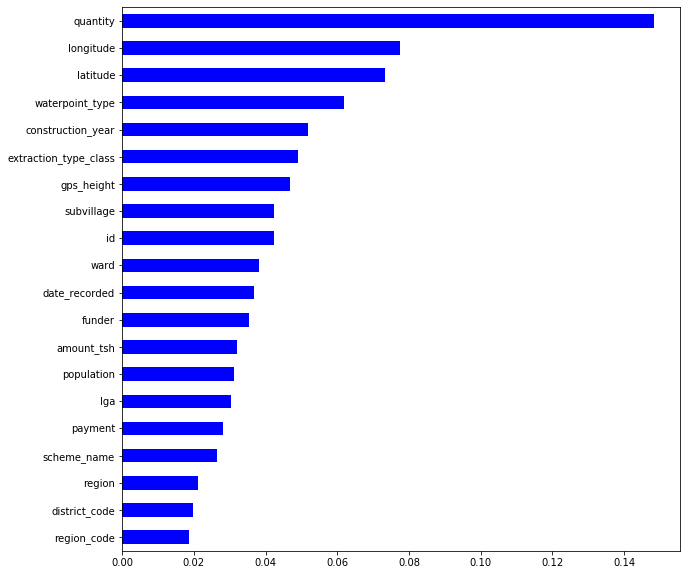

In [5]:
rf = pipeline.named_steps['randomforestclassifier']
encoder = pipeline.named_steps['ordinalencoder']
encoded = encoder.transform(X_train)

importances = pd.Series(rf.feature_importances_, encoded.columns)

n = 20
plt.figure(figsize=(10, 10))
importances.sort_values()[-n:].plot.barh(color='b');

In [6]:
y_pred = pipeline.predict(X_test)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-01.csv', index=False)